In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [10]:
# ax = sns.boxplot(x="day", y="total_bill", data=tips, palette="Set2")
# ax.set_title('test, test, test')

In [30]:
def raw_data_to_dataframe(gpu_data_path, cpu_data_path):
  """
  transfer raw data from test to pandas dataframe 
  example data frame: 
  [put_time]  [thread_num]  [platform]
  0.001           10            GPU-MPI
  0.0001          10            OPEN-MPI 
  ...  
  """
  pd_data = pd.DataFrame(columns = ['put_time', 'thread_num', 'platform'])
  # demo 
  # pd_data = pd_data.append({'sending_time': 0.001, 'thread_num': 10, 'platform': 'GPU-MPI'}, ignore_index=True)
  # pd_data = pd_data.append({'sending_time': 0.0001, 'thread_num': 10, 'platform': 'OPEN-MPI'}, ignore_index=True)

  # read gpu test file
  file = open(gpu_data_path, 'r')
  for line in file.readlines():
    elements = line.strip().split()
    # if the line not starts with '#', then ignored
    if len(elements) == 0 or not elements[0] == '#':
      continue
    row = {
        'put_time': float(elements[4]), 
        'thread_num': int(elements[1]) * 2, 
        'platform': 'GPU-MPI'
    }
    pd_data = pd_data.append(row, ignore_index=True)
  file.close()
  
  # read cpu test file 
  file = open(cpu_data_path, 'r')
  for line in file.readlines():
    elements = line.strip().split()
    # if the line not starts with '#', then ignored
    if len(elements) == 0 or not elements[0] == '#':
      continue
    row = {
        'put_time': float(elements[4]), 
        'thread_num': int(elements[1]) * 2, 
        'platform': 'OPEN-MPI'
    }
    pd_data = pd_data.append(row, ignore_index=True)
  file.close()

  return pd_data


In [31]:
# read data 
data_path = 'res_put_benchmark_cuda.txt'
thread_time_data = raw_data_to_dataframe(data_path, 'res_put_benchmark_cpu.txt')

In [32]:
thread_time_data

,put_time,thread_num,platform
0,0.000196,2,GPU-MPI
1,0.000196,2,GPU-MPI
2,0.000196,2,GPU-MPI
3,0.000196,2,GPU-MPI
4,0.000196,2,GPU-MPI
...,...,...,...
993,0.000560,100,OPEN-MPI
994,0.000760,100,OPEN-MPI
995,0.001561,100,OPEN-MPI
996,0.001040,100,OPEN-MPI


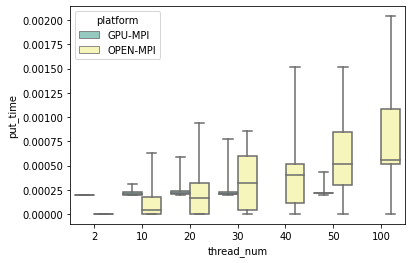

In [34]:
ax = sns.boxplot(x="thread_num", y="put_time", hue='platform', data=thread_time_data, palette="Set3", whis=(0, 100))

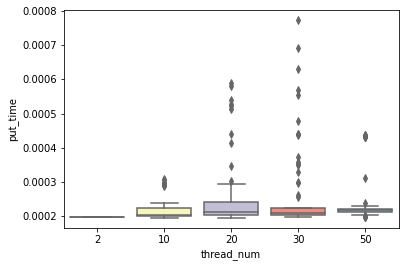

In [38]:
# subplot
data_gpu = thread_time_data[thread_time_data['platform'] == 'GPU-MPI']
ax = sns.boxplot(x="thread_num", y="put_time", data=data_gpu, palette="Set3")

In [35]:
thread_time_data[thread_time_data['platform'] == 'GPU-MPI']

,put_time,thread_num,platform
0,0.000196,2,GPU-MPI
1,0.000196,2,GPU-MPI
2,0.000196,2,GPU-MPI
3,0.000196,2,GPU-MPI
4,0.000196,2,GPU-MPI
...,...,...,...
429,0.000219,50,GPU-MPI
430,0.000219,50,GPU-MPI
431,0.000219,50,GPU-MPI
432,0.000222,50,GPU-MPI
